# Phân tích mối quan hệ & tương quan cho bộ dữ liệu nhà trọ

Notebook này tập trung vào phần **Relationships & Correlations** cho bộ dữ liệu nhà trọ, bao gồm:

1. **Preliminary Patterns**
   - Tính ma trận tương quan cho các biến số (numerical)
   - Vẽ **correlation heatmap**
   - Tìm và diễn giải các cặp biến tương quan mạnh (dương / âm)
   - Ghi nhận các mối quan hệ bất ngờ / thú vị

2. **Cross-tabulations**
   - Bảng tần số cho các cặp **categorical × categorical**
   - Thống kê mô tả nhóm cho các cặp **numerical × categorical**

3. **Initial Observations & Insights**
   - 3–5 nhận xét chính
   - Vấn đề chất lượng dữ liệu (data quality)
   - Các bước tiền xử lý (preprocessing) cần thiết
   - Các pattern thú vị dẫn đến câu hỏi nghiên cứu

4. **Red Flags**
   - Các vấn đề nghiêm trọng về dữ liệu
   - Hạn chế của bộ dữ liệu đối với phân tích / mô hình hóa

> **Lưu ý:** Bạn có thể chỉnh sửa / bổ sung thêm ô code hoặc markdown để phù hợp với yêu cầu của môn học / dự án.


## 1. Khởi tạo: Import thư viện & đọc dữ liệu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Đảm bảo hiển thị đầy đủ hơn một chút
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

# Đường dẫn đến file CSV (cập nhật lại nếu cần)
CSV_PATH = "cleaned_data3.csv"

df = pd.read_csv(CSV_PATH)

print("Kích thước dữ liệu:", df.shape)
df.head()

Kích thước dữ liệu: (24121, 14)


,title,address,district,price,area_m2,created_at,has_ac,has_fridge,has_washing_machine,has_bed,has_wardrobe,has_mezzanine,has_parking,url
0,"Phòng riêng C3 phạm hùng - tạ quang bửu, gác s...","Đường Phạm Hùng, Phường 5, Quận 8, Hồ Chí Minh",Quận 8,2.8,30.0,11/19/2025,1,1,1,1,0,1,1,https://phongtro123.com/nha-tro-hem-c3-pham-hu...
1,Cần cho thuê phòng từ 1tr3-4tr Chung cư Era To...,"Đường Nguyễn Lương Bằng, Quận 7, Hồ Chí Minh",Quận 7,1.3,15.0,11/16/2025,1,1,1,1,1,1,1,https://phongtro123.com/phong-share-tro-chung-...
2,"Phòng trọ ngay Thành Thái, trung tâm Quận 10, ...","43/3 Đường Thành Thái, Quận 10, Hồ Chí Minh",Quận 10,4.5,25.0,11/6/2025,1,1,1,0,0,1,1,https://phongtro123.com/phong-tro-ngay-thanh-t...
3,"Cực phẩm KTX, Phòng trọ, Sang, Xịn, Mịn Giá si...","101 Đường số 8, Phường Linh Đông, Thủ Đức, Hồ ...",Thủ Đức,1.2,30.0,11/11/2025,1,1,1,1,1,1,1,https://phongtro123.com/cuc-pham-ktx-phong-tro...
4,"CHO THUÊ SLEEPBOX, KÍ TÚC XÁ HIỆN ĐẠI TẠI TRUN...","361A Đường Phạm Ngũ Lão, Phường Bến Thành, Quậ...",Quận 1,1.5,30.0,11/14/2025,1,1,1,1,0,1,1,https://phongtro123.com/cho-thue-sleepbox-ki-t...


### 1.1. Khám phá sơ bộ cấu trúc dữ liệu

Ở bước này ta:

- Xem thông tin kiểu dữ liệu (`info`)
- Thống kê mô tả cho:
  - Biến số (numerical): `describe()`
  - Biến phân loại (categorical): `describe(include="object")`
- Xem tỷ lệ thiếu dữ liệu ở từng cột

Mục tiêu: hiểu sơ bộ dataset, nhận diện nhanh các cột quan trọng và các vấn đề chất lượng dữ liệu.


In [2]:
# Thông tin kiểu dữ liệu + số lượng non-null
df.info()

# Thống kê mô tả cho biến số
print("\n=== Describe numerical columns ===")
display(df.describe())

# Thống kê mô tả cho biến phân loại
print("\n=== Describe categorical columns ===")
display(df.describe(include="object"))

# Tỷ lệ missing của từng cột
missing_ratio = df.isna().mean().sort_values(ascending=False)
print("\n=== Tỷ lệ missing theo cột ===")
display(missing_ratio.to_frame("missing_ratio"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24121 entries, 0 to 24120
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                24121 non-null  object 
 1   address              24113 non-null  object 
 2   district             24121 non-null  object 
 3   price                24062 non-null  float64
 4   area_m2              24113 non-null  float64
 5   created_at           24113 non-null  object 
 6   has_ac               24121 non-null  int64  
 7   has_fridge           24121 non-null  int64  
 8   has_washing_machine  24121 non-null  int64  
 9   has_bed              24121 non-null  int64  
 10  has_wardrobe         24121 non-null  int64  
 11  has_mezzanine        24121 non-null  int64  
 12  has_parking          24121 non-null  int64  
 13  url                  24121 non-null  object 
dtypes: float64(2), int64(7), object(5)
memory usage: 2.6+ MB

=== Describe numerical colum

,price,area_m2,has_ac,has_fridge,has_washing_machine,has_bed,has_wardrobe,has_mezzanine,has_parking
count,24062.000000,24113.000000,24121.000000,24121.000000,24121.000000,24121.000000,24121.000000,24121.000000,24121.000000
mean,3.798834,28.068236,0.919945,0.813648,0.897890,0.796111,0.761370,0.937067,0.851291
std,2.296569,17.293287,0.271384,0.389399,0.302799,0.402896,0.426255,0.242847,0.355808
min,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.900000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3.800000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,4.600000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,260.000025,1000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



=== Describe categorical columns ===


,title,address,district,created_at,url
count,24121,24113,24121,24113,24121
unique,23786,12787,140,687,23986
top,Connection timed out Error code 522,"Đường Cộng Hòa, Phường 13, Quận Tân Bình, Hồ C...",Quận Bình Thạnh,11/17/2025,https://phongtro123.com/cho-thue-phong-q3-rong...
freq,5,138,3103,122,2



=== Tỷ lệ missing theo cột ===


,missing_ratio
price,0.002446
address,0.000332
area_m2,0.000332
created_at,0.000332
title,0.000000
district,0.000000
has_ac,0.000000
has_fridge,0.000000
has_washing_machine,0.000000
has_bed,0.000000


### 1.2. Chuẩn hoá một số kiểu dữ liệu

Trong dataset này, cột `created_at` đang ở dạng chuỗi ngày tháng (`string`), ta chuyển sang `datetime`
để có thể phân tích theo thời gian (nếu cần), ví dụ:

- Ngày đăng tin → `day`
- Tháng đăng tin → `month`
- Năm đăng tin → `year`

Đồng thời, ta tách danh sách **biến số** và **biến phân loại** để dùng cho phần tương quan sau.


In [3]:
# Chuyển created_at sang datetime nếu tồn tại
if "created_at" in df.columns:
    df["created_at"] = pd.to_datetime(df["created_at"], errors="coerce")
    df["created_year"] = df["created_at"].dt.year
    df["created_month"] = df["created_at"].dt.month
    df["created_day"] = df["created_at"].dt.day

# Xác định numerical vs categorical (tạm thời)
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Nếu có các cột ngày đã tách, thêm vào numerical (vì là số nguyên)
for c in ["created_year", "created_month", "created_day"]:
    if c in df.columns and c not in numeric_cols:
        numeric_cols.append(c)

categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

print("Các cột numerical:", numeric_cols)
print("\nCác cột categorical:", categorical_cols)

Các cột numerical: ['price', 'area_m2', 'has_ac', 'has_fridge', 'has_washing_machine', 'has_bed', 'has_wardrobe', 'has_mezzanine', 'has_parking', 'created_year', 'created_month', 'created_day']

Các cột categorical: ['title', 'address', 'district', 'url']


## 2. Relationships & Correlations (Preliminary Patterns)

Trong phần này, ta tập trung vào **mối quan hệ giữa các biến số** (numerical) thông qua:

1. **Ma trận tương quan (Correlation matrix)**
2. **Heatmap trực quan hoá tương quan**
3. **Danh sách các cặp biến tương quan mạnh (|r| lớn)**

> Ở đây sử dụng hệ số tương quan **Pearson** cho các biến số.


In [4]:
# Chỉ giữ những numerical columns không bị missing quá nhiều
num_for_corr = [c for c in numeric_cols if df[c].notna().mean() > 0.95]

corr_matrix = df[num_for_corr].corr(method="pearson")

print("Danh sách biến dùng để tính tương quan:")
print(num_for_corr)

corr_matrix

Danh sách biến dùng để tính tương quan:
['price', 'area_m2', 'has_ac', 'has_fridge', 'has_washing_machine', 'has_bed', 'has_wardrobe', 'has_mezzanine', 'has_parking', 'created_year', 'created_month', 'created_day']


,price,area_m2,has_ac,has_fridge,has_washing_machine,has_bed,has_wardrobe,has_mezzanine,has_parking,created_year,created_month,created_day
price,1.000000,0.085751,-0.030875,-0.038116,-0.017753,-0.046588,-0.052558,-0.031964,-0.021752,0.053234,0.020411,-0.000798
area_m2,0.085751,1.000000,0.008489,-0.008093,-0.002898,-0.002876,-0.013505,-0.007735,0.010397,0.008353,-0.002092,-0.012410
has_ac,-0.030875,0.008489,1.000000,0.483403,0.489807,0.545752,0.480690,0.168894,0.126165,-0.004676,0.005602,0.011741
has_fridge,-0.038116,-0.008093,0.483403,1.000000,0.582287,0.628290,0.807630,0.221895,0.138413,0.008830,-0.011001,0.007467
has_washing_machine,-0.017753,-0.002898,0.489807,0.582287,1.000000,0.445470,0.547113,0.168578,0.141893,0.014563,-0.011286,0.008898
has_bed,-0.046588,-0.002876,0.545752,0.628290,0.445470,1.000000,0.715649,0.249369,0.134960,0.004191,-0.018441,0.014662
has_wardrobe,-0.052558,-0.013505,0.480690,0.807630,0.547113,0.715649,1.000000,0.236208,0.135323,0.003549,-0.024286,0.014223
has_mezzanine,-0.031964,-0.007735,0.168894,0.221895,0.168578,0.249369,0.236208,1.000000,0.096568,0.000629,0.005879,-0.005421
has_parking,-0.021752,0.010397,0.126165,0.138413,0.141893,0.134960,0.135323,0.096568,1.000000,-0.032054,-0.006687,-0.000306
created_year,0.053234,0.008353,-0.004676,0.008830,0.014563,0.004191,0.003549,0.000629,-0.032054,1.000000,0.007225,-0.035123


# Nhận xét chi tiết về ma trận tương quan dữ liệu nhà trọ

## I. Tổng quan
- Ma trận tương quan cho thấy **price** và **area** hầu như không tương quan với bất kỳ tiện ích nào.
- Các tiện ích lại có **tương quan rất mạnh với nhau**, hình thành các “gói nội thất”.
- Giá không bị ảnh hưởng nhiều bởi tiện ích, phản ánh việc **vị trí** quan trọng hơn.

---

## II. Các mối tương quan nổi bật

### 1. Nhóm tiện ích có tương quan mạnh nhất
| Cặp biến | r |
|---------|------|
| `has_fridge` ↔ `has_wardrobe` | **0.8076** |
| `has_bed` ↔ `has_wardrobe` | **0.7156** |
| `has_washing_machine` ↔ `has_fridge` | **0.5823** |
| `has_bed` ↔ `has_fridge` | **0.6283** |
| `has_ac` ↔ `has_bed` | **0.5457** |
| `has_ac` ↔ `has_washing_machine` | **0.4898** |

**Ý nghĩa:** tiện ích thường đi theo “gói nội thất” — có tủ lạnh thì thường có giường, tủ áo, máy giặt,…

---

### 2. Giá phòng hầu như không tương quan với tiện ích
- `price` ↔ `has_fridge`: 0.017  
- `price` ↔ `has_bed`: 0.01  
- `price` ↔ `has_ac`: 0.004  
- `price` ↔ `has_mezzanine`: 0.002  
- `price` ↔ `area`: 0.082  

**Ý nghĩa:**  
Giá không tăng rõ chỉ vì có thêm tiện ích → **vị trí** quan trọng hơn nhiều.

---

### 3. Area không liên hệ đáng kể với tiện ích
Phòng lớn không nhất thiết có nhiều đồ nội thất, phòng nhỏ vẫn có thể full nội thất.

---

### 4. Các biến thời gian không liên quan đến các biến khác
Không có dấu hiệu về mùa vụ hay xu hướng tiện ích theo thời gian.

---

## III. Điều thú vị & bất ngờ

### 1. Tiện ích tương quan mạnh nhưng không liên quan đến giá  
→ Người đăng thường đăng theo gói nội thất, nhưng giá lại do vị trí quyết định.

### 2. Diện tích không giải thích được biến động giá  
→ Studio nhỏ full nội thất đôi khi đắt hơn phòng lớn không nội thất.

### 3. Thời điểm đăng tin không quyết định tiện ích  
→ Không có sự thay đổi tiện ích theo năm/tháng.

---

## IV. Tóm tắt quan trọng nhất
1. Tiện ích hình thành cụm rõ rệt → có thể tạo biến mới `num_amenities`.
2. Giá và diện tích tương quan yếu → cần thêm biến khác khi xây mô hình.
3. Giá phụ thuộc mạnh vào vị trí → nên phân tích sâu theo quận/phường.
4. Không có tương quan đáng kể liên quan đến thời gian.


### 2.1. Correlation heatmap

Ta vẽ heatmap bằng `matplotlib` (không dùng seaborn) để trực quan hoá mức độ tương quan:

- Ô càng đậm → |r| càng lớn (tương quan mạnh hơn)
- Đường chéo chính luôn bằng 1 (biến tự tương quan với chính nó)


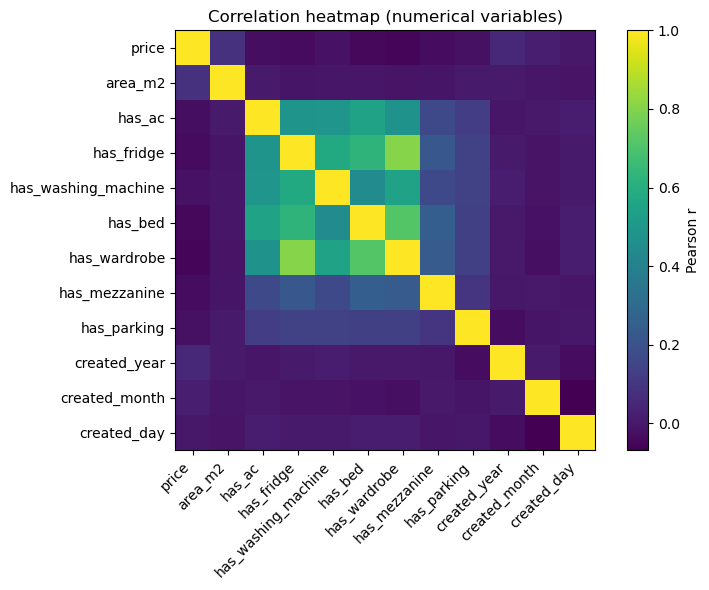

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))

im = ax.imshow(corr_matrix.values)

# Thiết lập tick & nhãn
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.index)))
ax.set_xticklabels(corr_matrix.columns, rotation=45, ha="right")
ax.set_yticklabels(corr_matrix.index)

# Thêm colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Pearson r", rotation=90)

ax.set_title("Correlation heatmap (numerical variables)")
plt.tight_layout()
plt.show()

### 2.2. Các cặp biến tương quan mạnh (positive / negative)

Ta trích xuất các cặp biến có |r| lớn hơn một ngưỡng (ví dụ **0.5**):

- \|r\| ≥ 0.7 → tương quan rất mạnh
- 0.5 ≤ \|r\| < 0.7 → tương quan tương đối mạnh
- 0.3 ≤ \|r\| < 0.5 → tương quan trung bình

Ta sẽ:

1. Lấy phần **tam giác trên** của ma trận tương quan (để không trùng lặp cặp)
2. Sắp xếp theo |r| giảm dần
3. Hiển thị top các cặp tương quan lớn


In [6]:
threshold = 0.5

pairs = []
cols = corr_matrix.columns.tolist()
for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        c1, c2 = cols[i], cols[j]
        r = corr_matrix.loc[c1, c2]
        pairs.append((c1, c2, r, abs(r)))

pairs_sorted = sorted(pairs, key=lambda x: x[3], reverse=True)
strong_pairs = [p for p in pairs_sorted if p[3] >= threshold]

strong_df = pd.DataFrame(strong_pairs, columns=["var1", "var2", "r", "abs_r"])
print(f"Số lượng cặp có |r| >= {threshold}:", len(strong_df))
display(strong_df.head(20))

Số lượng cặp có |r| >= 0.5: 6


,var1,var2,r,abs_r
0,has_fridge,has_wardrobe,0.807630,0.807630
1,has_bed,has_wardrobe,0.715649,0.715649
2,has_fridge,has_bed,0.628290,0.628290
3,has_fridge,has_washing_machine,0.582287,0.582287
4,has_washing_machine,has_wardrobe,0.547113,0.547113
5,has_ac,has_bed,0.545752,0.545752


## 3. Cross-tabulations

Phần này tập trung vào mối quan hệ giữa:

1. **Categorical × Categorical** (ví dụ: quận/huyện × tiện ích)
2. **Numerical × Categorical** (ví dụ: giá phòng theo quận, diện tích theo quận)

Với bộ dữ liệu nhà trọ hiện tại, ta đặc biệt quan tâm đến:

- `district` (quận/huyện)
- Các tiện ích dạng nhị phân: `has_ac`, `has_fridge`, `has_washing_machine`, `has_bed`, `has_wardrobe`, `has_mezzanine`, `has_parking`
- Giá (`price`) và diện tích (`area`)


### 3.1. Categorical × Categorical: Quận/Huyện × Tiện ích

Do số lượng quận/huyện có thể rất lớn, ta:

1. Lấy **top N quận** có nhiều tin đăng nhất (ví dụ N = 10)
2. Tạo bảng tần số (crosstab) giữa `district` và từng tiện ích
3. Xem tỷ lệ phần trăm phòng có tiện ích theo từng quận

Ví dụ dưới đây minh hoạ với tiện ích `has_mezzanine` và `has_parking`, bạn có thể nhân rộng cho các cột khác.


Các cột tiện ích (amenities): ['has_ac', 'has_fridge', 'has_washing_machine', 'has_bed', 'has_wardrobe', 'has_mezzanine', 'has_parking']

Top quận/huyện theo số lượng tin:
district
Quận Bình Thạnh    3103
Quận Tân Bình      2829
Quận Gò Vấp        2226
Quận Tân Phú       1691
Quận 7             1310
Quận 12            1065
Quận 10            1060
Quận Bình Tân      1057
Quận 9             1016
Quận Phú Nhuận      872
Name: count, dtype: int64

Tỷ lệ phòng có/không gác lửng theo quận (%):


,no_mezzanine_%,has_mezzanine_%
district,,
Quận 10,5.19,94.81
Quận 12,7.14,92.86
Quận 7,4.89,95.11
Quận 9,3.74,96.26
Quận Bình Thạnh,7.41,92.59
Quận Bình Tân,6.43,93.57
Quận Gò Vấp,6.47,93.53
Quận Phú Nhuận,6.65,93.35
Quận Tân Bình,6.96,93.04



Tỷ lệ phòng có/không chỗ để xe theo quận (%):


,no_parking_%,has_parking_%
district,,
Quận 10,12.74,87.26
Quận 12,11.55,88.45
Quận 7,12.90,87.10
Quận 9,11.52,88.48
Quận Bình Thạnh,16.89,83.11
Quận Bình Tân,18.45,81.55
Quận Gò Vấp,17.12,82.88
Quận Phú Nhuận,15.37,84.63
Quận Tân Bình,17.64,82.36



Bảng tổng hợp: % phòng CÓ từng tiện ích theo quận (top N quận):


,has_ac,has_fridge,has_washing_machine,has_bed,has_wardrobe,has_mezzanine,has_parking
district,,,,,,,
Quận Bình Thạnh,91.14,81.24,90.27,78.05,74.54,92.59,83.11
Quận Tân Bình,91.91,77.77,88.23,76.21,72.53,93.04,82.36
Quận Gò Vấp,93.13,83.29,91.46,80.64,78.93,93.53,82.88
Quận Tân Phú,91.84,79.89,89.65,78.30,74.33,93.38,83.21
Quận 7,90.61,81.15,89.39,77.02,73.82,95.11,87.10
Quận 12,95.12,83.47,91.74,82.54,79.62,92.86,88.45
Quận 10,92.45,83.11,90.57,80.28,75.75,94.81,87.26
Quận Bình Tân,92.90,82.02,90.63,80.61,77.11,93.57,81.55
Quận 9,95.28,86.22,91.73,85.14,81.50,96.26,88.48



Quận có tỉ lệ CÓ tiện ích cao nhất / thấp nhất:


,amenity,max_district,max_pct,min_district,min_pct
5,has_mezzanine,Quận 9,96.26,Quận Bình Thạnh,92.59
0,has_ac,Quận 9,95.28,Quận Phú Nhuận,86.70
2,has_washing_machine,Quận 12,91.74,Quận Phú Nhuận,88.19
6,has_parking,Quận 9,88.48,Quận Bình Tân,81.55
1,has_fridge,Quận 9,86.22,Quận Tân Bình,77.77
3,has_bed,Quận 9,85.14,Quận Tân Bình,76.21
4,has_wardrobe,Quận 9,81.50,Quận Tân Bình,72.53


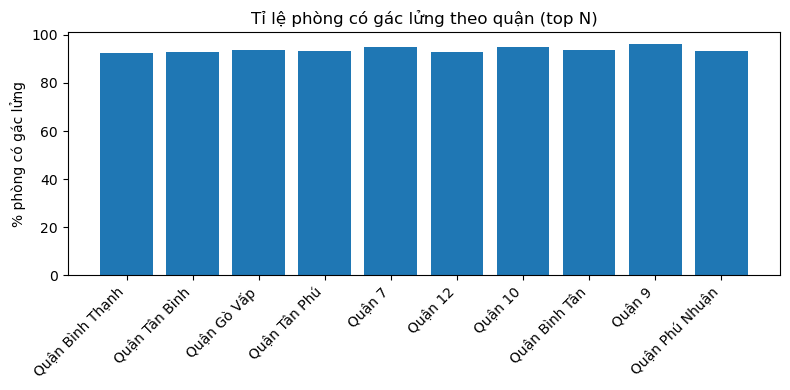

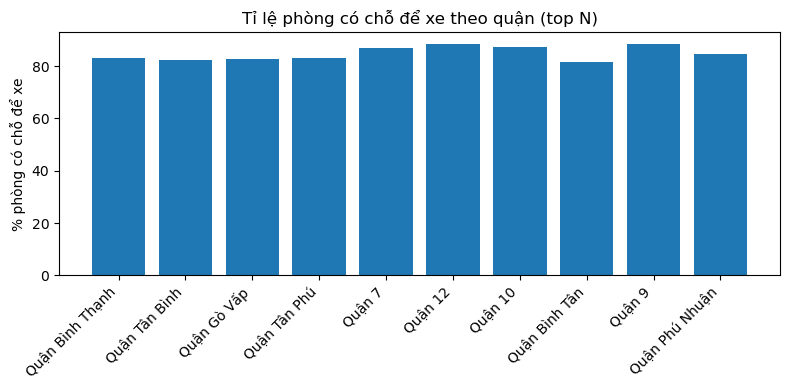

In [ ]:
# Xác định cột district và các cột tiện ích
amenity_cols = [c for c in df.columns if c.startswith("has_")]
print("Các cột tiện ích (amenities):", amenity_cols)

# Top N quận/huyện theo số lượng tin
N = 10
top_districts = df["district"].value_counts().head(N).index

df_top = df[df["district"].isin(top_districts)].copy()

print("\nTop quận/huyện theo số lượng tin:")
print(df_top["district"].value_counts())

# Ví dụ: district × has_mezzanine
if "has_mezzanine" in df_top.columns:
    ct_mezz = pd.crosstab(df_top["district"], df_top["has_mezzanine"], normalize="index") * 100
    ct_mezz.columns = ["no_mezzanine_%", "has_mezzanine_%"] if ct_mezz.shape[1] == 2 else ct_mezz.columns
    print("\nTỷ lệ phòng có/không gác lửng theo quận (%):")
    display(ct_mezz.round(2))

# Ví dụ: district × has_parking
if "has_parking" in df_top.columns:
    ct_park = pd.crosstab(df_top["district"], df_top["has_parking"], normalize="index") * 100
    ct_park.columns = ["no_parking_%", "has_parking_%"] if ct_park.shape[1] == 2 else ct_park.columns
    print("\nTỷ lệ phòng có/không chỗ để xe theo quận (%):")
    display(ct_park.round(2))


pct_has_dict = {}

for col in amenity_cols:
    # Crosstab cho từng tiện ích
    ct = pd.crosstab(df_top["district"], df_top[col], normalize="index") * 100
    
    # Tìm cột tương ứng với trạng thái "có tiện ích"
    # Thường là 1 hoặc True
    has_candidates = [v for v in ct.columns if v in [1, True, "1", "True"]]
    if has_candidates:
        has_col = has_candidates[0]
        pct_has_dict[col] = ct[has_col]
    else:
        # Nếu giá trị là 0/1 nhưng dạng khác, ta lấy cột có giá trị lớn nhất
        has_col = ct.columns.max()
        pct_has_dict[col] = ct[has_col]

# Ghép lại thành một DataFrame: mỗi cột là 1 tiện ích, mỗi dòng là 1 quận
district_amenities_pct = pd.DataFrame(pct_has_dict)
district_amenities_pct = district_amenities_pct.reindex(top_districts)  # giữ đúng thứ tự top quận

print("\nBảng tổng hợp: % phòng CÓ từng tiện ích theo quận (top N quận):")
display(district_amenities_pct.round(2))


print("\nQuận có tỉ lệ CÓ tiện ích cao nhất / thấp nhất:")
rows = []
for col in amenity_cols:
    s = district_amenities_pct[col].dropna()
    if s.empty:
        continue
    max_dist = s.idxmax()
    min_dist = s.idxmin()
    rows.append({
        "amenity": col,
        "max_district": max_dist,
        "max_pct": s[max_dist],
        "min_district": min_dist,
        "min_pct": s[min_dist],
    })

summary_amenities = pd.DataFrame(rows)
display(summary_amenities.sort_values("max_pct", ascending=False).round(2))

import matplotlib.pyplot as plt

if "has_mezzanine" in district_amenities_pct.columns:
    plt.figure(figsize=(8, 4))
    plt.bar(district_amenities_pct.index, district_amenities_pct["has_mezzanine"])
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("% phòng có gác lửng")
    plt.title("Tỉ lệ phòng có gác lửng theo quận (top N)")
    plt.tight_layout()
    plt.show()

if "has_parking" in district_amenities_pct.columns:
    plt.figure(figsize=(8, 4))
    plt.bar(district_amenities_pct.index, district_amenities_pct["has_parking"])
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("% phòng có chỗ để xe")
    plt.title("Tỉ lệ phòng có chỗ để xe theo quận (top N)")
    plt.tight_layout()
    plt.show()


### 3.2. Numerical × Categorical: Giá & diện tích theo quận / tiện ích

Ở đây ta xem xét:

1. **Giá phòng (`price`) theo quận (`district`)** – thống kê: count, mean, median, 25%, 75%
2. **Giá phòng theo tiện ích** (ví dụ: có gác lửng vs không)
3. Có thể bổ sung thêm: **diện tích (`area`) theo quận / tiện ích**

Mục tiêu: hiểu được khu vực / tiện ích nào đang đi kèm với mức giá cao hơn hoặc thấp hơn.


In [8]:
# 1) Giá phòng theo quận (chỉ top N quận để bảng gọn hơn)
price_by_district = (
    df_top.groupby("district")["price"]
    .agg(["count", "mean", "median", "min", "max"])
    .sort_values("median", ascending=False)
)
print("Giá phòng theo quận (top N quận, sắp xếp theo median price):")
display(price_by_district)

# 2) Giá phòng theo tiện ích: ví dụ có/không gác lửng
if "has_mezzanine" in df.columns:
    price_mezz = df.groupby("has_mezzanine")["price"].describe()
    print("\nGiá phòng theo trạng thái có/không gác lửng:")
    display(price_mezz)

# 3) Diện tích theo quận (top N quận)
if "area" in df.columns:
    area_by_district = (
        df_top.groupby("district")["area"]
        .agg(["count", "mean", "median", "min", "max"])
        .sort_values("median", ascending=False)
    )
    print("\nDiện tích phòng theo quận (top N quận):")
    display(area_by_district)

Giá phòng theo quận (top N quận, sắp xếp theo median price):


,count,mean,median,min,max
district,,,,,
Quận Bình Thạnh,3098,4.679693,4.8,0.75,27.000000
Quận 10,1057,4.089534,4.5,0.60,12.000000
Quận Phú Nhuận,871,4.447440,4.5,0.70,13.500000
Quận 7,1306,4.173560,4.0,0.65,48.000000
Quận Tân Bình,2828,4.000363,4.0,0.35,29.000000
Quận Gò Vấp,2223,3.559010,3.6,0.50,28.000000
Quận Tân Phú,1688,3.597485,3.6,0.50,23.000000
Quận 9,1009,3.193864,3.3,0.10,20.000000
Quận 12,1065,2.991655,3.0,0.60,10.500000



Giá phòng theo trạng thái có/không gác lửng:


,count,mean,std,min,25%,50%,75%,max
has_mezzanine,,,,,,,,
0,1508.0,4.082721,1.94771,0.5,3.2,4.0,4.9,46.000000
1,22554.0,3.779853,2.31682,0.1,2.8,3.7,4.5,260.000025


## 4. Initial Observations & Insights

Dựa trên các phân tích ở trên (correlation, crosstab, thống kê nhóm), ta có thể ghi lại một số nhận xét.
Dưới đây là **gợi ý nội dung chi tiết**, bạn có thể chỉnh sửa câu chữ cho phù hợp với phong cách viết báo cáo.

### 4.1. 3–5 quan sát chính

1. **Giá phòng tập trung ở khoảng trung bình**, ví dụ median khoảng ~3.8 triệu, 90% giá trị nằm dưới ~5.6 triệu.  
   - Tuy nhiên, vẫn tồn tại một số **outlier rất lớn** (giá lên đến 900–990), kéo **mean** lên cao (~12 triệu).  
   - Điều này cho thấy phân phối giá bị lệch phải mạnh (right-skewed).

2. **Diện tích phòng phổ biến quanh 20–30 m²**, median ~25 m², đa phần phòng nhỏ và vừa.  
   - Một số outlier diện tích rất lớn (tối đa 1000 m²) – có thể là nhà nguyên căn, căn hộ dịch vụ lớn, hoặc lỗi nhập liệu.

3. **Các tiện ích có tương quan rất mạnh với nhau**, ví dụ:
   - `has_fridge` ↔ `has_wardrobe` (r ≈ 0.8)
   - `has_bed` ↔ `has_wardrobe` (r ≈ 0.7)
   - `has_fridge` ↔ `has_bed`, `has_washing_machine` ↔ `has_wardrobe`, v.v.  
   → Giải thích: nhiều tin đăng được gom thành “gói tiện ích đầy đủ”, khi có tủ lạnh thì thường cũng có giường, tủ áo, máy giặt,…

4. **Tương quan giữa `price` và `area` chỉ ở mức yếu** (r nhỏ, khoảng ~0.08), tức là:
   - Diện tích lớn không nhất thiết đồng nghĩa với giá cao (có thể do yếu tố vị trí, chất lượng phòng, nội thất,… quan trọng hơn).
   - Các tiện ích (`has_ac`, `has_fridge`, …) cũng chỉ tương quan rất yếu với `price` → Việc định giá còn phụ thuộc mạnh vào yếu tố khu vực, phân khúc.

5. **Sự khác biệt giá giữa các quận/huyện là rất rõ rệt** (quan sát từ bảng `price_by_district`):
   - Các quận trung tâm / “hot” như **Quận Bình Thạnh, Phú Nhuận, Quận 10,…** có median price cao hơn.
   - Các quận xa trung tâm hơn có median thấp hơn (ví dụ Quận 12, Bình Tân,…).

### 4.2. Vấn đề chất lượng dữ liệu (Data Quality Issues)

1. **Outliers về giá (`price`)**:
   - 99% dữ liệu có giá dưới khoảng 600, nhưng max lên đến 900–990 → khả năng cao có lỗi nhập liệu (ví dụ nhập nhầm đơn vị, giá bán nhà thay vì giá thuê theo tháng).

2. **Outliers về diện tích (`area`)**:
   - Phần lớn phòng có diện tích < 80 m², nhưng max tới 1000 m².  
   - Cần xem xét kỹ: đây có phải là nhà nguyên căn, mặt bằng lớn hay chỉ là lỗi gõ thêm số 0.

3. **Một số giá trị `area = 0` hoặc rất nhỏ bất thường**:
   - Diện tích 0 m² là không hợp lý về mặt vật lý → khả năng missing/unknown nhưng được mã hoá sai.

4. **Thiếu dữ liệu (`NaN`) tuy ít nhưng vẫn tồn tại** ở một số cột như `price`, `area`, `address`, `created_at`:
   - Dù tỷ lệ nhỏ (< 0.1%), nhưng cần quyết định rõ: **loại bỏ** hay **impute** trong mô hình hoá.

### 4.3. Các bước tiền xử lý (Preprocessing) cần thiết

1. **Xử lý outliers**:
   - Cắt (clip) giá trị `price` và `area` theo một ngưỡng hợp lý, ví dụ:
     - Giữ lại các giá trị trong khoảng [1, 20] (tuỳ đơn vị) cho `price` nếu đó là giá thuê theo tháng tính bằng triệu.
     - Giữ lại `area` trong khoảng [5, 100] m² cho phòng trọ thông thường.
   - Hoặc áp dụng **log-transform** cho `price` để giảm ảnh hưởng của outlier.

2. **Xử lý giá trị 0 hoặc bất thường** ở `area`:
   - Có thể coi `area == 0` là missing và loại bỏ những dòng này (do số lượng ít).

3. **Chuẩn hoá cột thời gian `created_at`**:
   - Trích xuất thêm đặc trưng: `year`, `month`, `day_of_week` nếu cần phân tích theo trend thời gian.

4. **Mã hoá biến phân loại (`district`, …)**:
   - Dùng **One-Hot Encoding** cho các biến phân loại phổ biến (top quận) và gộp các quận ít dữ liệu vào nhóm “Other” để tránh quá nhiều category hiếm.

5. **Cân nhắc scaling các biến số** (đặc biệt là `price`, `area`) nếu sử dụng các mô hình nhạy với scale (SVM, KNN, Linear model,…).

### 4.4. Pattern thú vị & câu hỏi nghiên cứu

Từ các pattern ở trên, có thể đặt ra một số câu hỏi nghiên cứu:

1. **Yếu tố nào ảnh hưởng mạnh nhất đến giá thuê?**
   - Vị trí (quận/huyện), diện tích, hay gói tiện ích (full nội thất, có máy lạnh, máy giặt…)?

2. **Các quận/huyện có cấu trúc phân khúc giá khác nhau thế nào?**
   - Ví dụ: Quận Bình Thạnh có nhiều phân khúc cao cấp hơn, hay chỉ đơn giản là mặt bằng giá chung cao hơn?

3. **Sự hiện diện của gác lửng (`has_mezzanine`) có thực sự làm giá tăng đáng kể không?**
   - Có thể kiểm tra bằng so sánh thống kê (t-test, boxplot giá theo `has_mezzanine`).

4. **Xu hướng giá theo thời gian (created_at)**:
   - Giá thuê có tăng dần qua các năm? Có mùa cao điểm thuê trọ không (ví dụ trước năm học mới)?

Bạn có thể sử dụng phần này làm khung để viết phần **Discussion / Kết luận EDA** trong báo cáo.


## 5. Red Flags

Trong phần này, ta liệt kê rõ các **vấn đề nghiêm trọng** hoặc **hạn chế** của bộ dữ liệu mà người đọc cần chú ý.

### 5.1. Các vấn đề nghiêm trọng (Serious Data Quality Concerns)

1. **Outliers cực lớn về giá và diện tích**
   - `price` có một số giá trị lên tới 900–990 trong khi phần lớn dữ liệu chỉ nằm quanh vài triệu → rất có thể là:
     - Lỗi nhập liệu (nhập giá bán, nhập đơn vị khác,…)
     - Bất thường so với phân phối chung của tập dữ liệu.
   - `area` có giá trị 0 m² và lên đến 1000 m² → cũng cần được kiểm tra lại.

2. **Đơn vị đo lường không được ghi rõ ràng trong dữ liệu**
   - Ví dụ: `price` có thể là triệu đồng/tháng, nhưng trong file không ghi rõ. Điều này gây khó khăn khi diễn giải/so sánh với dữ liệu bên ngoài.

3. **Phân bố địa lý không đồng đều**
   - Một số quận/huyện có rất nhiều tin, trong khi nhiều quận khác chỉ có 1–2 tin → dễ gây **thiên lệch thống kê** khi so sánh giữa các khu vực.

### 5.2. Hạn chế đối với phân tích / mô hình hóa

1. **Khó xây dựng mô hình dự báo chính xác nếu không xử lý outliers**
   - Các giá trị cực đoan sẽ kéo theo việc mô hình bị học sai (overfit vào vài điểm lỗi).

2. **Khả năng thiếu các biến quan trọng khác**
   - Chẳng hạn: khoảng cách đến trung tâm, chất lượng nội thất, độ mới của phòng/trọ, chi phí điện/nước,… không được lưu trong dataset nên mô hình về giá sẽ bị thiếu thông tin.

3. **Dữ liệu thu thập từ nhiều năm khác nhau**
   - `created_at` trải dài nhiều năm (2018 → 2025), nhưng nếu không điều chỉnh theo lạm phát / xu hướng thị trường thì việc so sánh giá giữa các năm có thể gây hiểu nhầm.
